# Lab 2: Runtime Analysis

## <font color=DarkRed>Your Exercise: Find the $k$th Smallest Number</font>

Given a list of numbers in random order, write an algorithm that works in $O(n\log(n))$ time to find the $k$th smallest number in the list.

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct.*

## GitHub: abhijit-baruah

For any given list, the $k$th smallest number inthe list could be found by first sorting the list and then extracting the $k$th smallest number from this sorted list. Since we are to write an algorithm for such a sorting technique that works in $O(n\log(n))$, we implement the $HeapSort$ algorithm that is known from texts to work in $O(n\log(n))$. The algorithm is described below.

The simplest idea behind $HeapSort$ is to first find the maximum element and place it at the end of the list. Then, repeat the same with a reduced list after removing the last element. The algorithm would end when there is only one element remaining, which is essentially the smallest element in the first index position. Thereby giving us a list increasingly sorted. In order to implement the procedure in detail, we need to first understand a few key definitions, be it in the simplest term.
1. Each entry of a list can be regarded as a node. 
2. A binary tree is made of nodes, where each node contains a "left" reference, a "right" reference, and a data element. The topmost node in the tree is called the root.
3. Every node (excluding a root) in a tree is connected by a directed edge from exactly one other node. This node is called a parent. 
4. On the other hand, each node can be connected to arbitrary number of nodes, called children. 
5. Nodes with no children are called leaves, or external nodes. 
6. Nodes which are not leaves are called internal nodes. Nodes with the same parent are called siblings.
7. A full binary tree.is a binary tree in which each node has exactly zero or two children.
8. A complete binary tree is a binary tree, which is completely filled, with the possible exception of the bottom level, which is filled from left to right.
(Source: https://www.cs.cmu.edu/~adamchik/15-121/lectures/Trees/trees.html)

Now, for a Complete Binary Tree where items are stored in a special order such that value in a parent node is greater(or smaller) than the values in its two children nodes, then the former is called "max heap" and the latter is called "min heap". The heap can be represented by a binary tree or array.

## Heap Sort Algorithm for sorting in increasing order:
1. Since, a binary heap is essentially a complete binary tree, we can represent it as an array. 
2. If the parent node is at index $i$ then the children nodes with "left" and "right" references could be at indices calculated by $2i+1$ and $2i+2$ respctively.
3. For each of these binary heaps, we sort the array such that the parent node is larger than the children nodes.
4. As we sort similarly over all parent nodes, we obtain our max heap.
5. At this point, the largest item is stored at the root of the heap which is the first index in array format.
6. We replace this largest item with the last item of the heap/array.
7. Remove the largest item, thereby reducing the list by one and repeat heapify on the root. Thus, completing the idea behind our $HeapSort$ algorithm.

## Implementation of the $HeapSort$ Algorithm

In [1]:
# First, we create a function that takes as input a binary heap, size of list and an initial index position that sorts/heapifies
# the parent root such that it is greater than or equal to the child nodes.

def make_heap(alist, n, i): # we pass the list/array, size of heap, and parent root index
    largest = i # set largest as intial root
    l = 2 * i + 1     # left reference of child at index = 2*i + 1 
    r = 2 * i + 2     # right reference of child at index = 2*i + 2 
  
    # Check whether left child of root exists and is greater than root 
    # If so, assign largest index as the index of the child
    if (l < n and alist[i] < alist[l]): 
        largest = l 
  
    # Check whether right child of root exists and is greater than root 
    # If so, assign largest index as the index of the child
    if (r < n and alist[largest] < alist[r]): 
        largest = r 
  
    # If index for largest element changed to that of a child node, then swap the child and parent node
    if (largest != i): 
        alist[i],alist[largest] = alist[largest],alist[i] # swap parent and child nodes
  
        # Heapify the root again until the parent root is the largest root in the binary heap. 
        make_heap(alist, n, largest) 
  

In [2]:
# a function to sort a list and print kth smallest using max-heap

def kth_smallest(alist, k): 
    n = len(alist) 
  
    # Next create the maximum heap.
    # We call the heapify procedure recursively to build heap in top down manner.
    # To do so, we start with parent node with largest index and gradually work our way up to lower indices.
    # This ensures that at the end of the precedure we have the largest item in our parent root node at the top.
    
    # The following choice of range ensures that first parent index and left child index are the two largest indices in the heap. 
    # The loop then runs over every binary heap with decreasing parent node index.
    for i in range(n//2 - 1, -1, -1): 
        make_heap(alist, n, i) 
  
    # Now we need to extract elements one by one, largest first
    # At this stage, the largest item is stored at the root of the heap. 
    # We replace it with the last item of the heap. 
    # Then reduce the size of heap by 1 node by removing the largest item in the last index.
    
    for i in range(n-1, 0, -1): 
        alist[i], alist[0] = alist[0], alist[i] # swap root parent node(largest item) and last node
        # Sort the heap on reduced list after removing the last node. In other words, heapify the root
        make_heap(alist, i, 0)
        # Go back into the loop to swap first (largest item) and last item.
        # Heapify new root in reduced list after removing next largest item.
        # Loop stops when there are only two items remaining.
        # At this stage we have a sorted list in ascending order.
    if k > n:
        print(f'ERROR: Chosen value of k={k} is larger than size of list. List size = {n}')
    else:
        print(f'The {k}-th smallest number for a random list of size {n} is: {alist[k-1]}')
        

In [8]:
import random
import time
import numpy as np

N = range(100, 10_000, 50)
t = [] # list of times required to obtain kth smallest number
count = 0

for i in N:
    size = i
    alist = [random.randint(0, i-1) for j in range(i)] # Create a random list of size N
    k = random.randint(0, i-1) # Select a random k to find k-smallest number in the list
    
    start = time.perf_counter() # start stopwatch
    kth_smallest(alist, k)
    end = time.perf_counter() # stop stopwatch
    diff = (end-start) # time taken to find kth smallest number
    t = np.append(t, diff)

    print(f'Time taken to compute is: {t[count]} seconds')
    print()
    count += 1
    


    

The 50-th smallest number for a random list of size 100 is: 51
Time taken to compute is: 0.0008061000000054719 seconds

The 65-th smallest number for a random list of size 150 is: 68
Time taken to compute is: 0.0007145999999949026 seconds

The 121-th smallest number for a random list of size 200 is: 122
Time taken to compute is: 0.0010864999999995462 seconds

The 10-th smallest number for a random list of size 250 is: 10
Time taken to compute is: 0.0031653000000062548 seconds

The 55-th smallest number for a random list of size 300 is: 58
Time taken to compute is: 0.00252779999999575 seconds

The 280-th smallest number for a random list of size 350 is: 283
Time taken to compute is: 0.0018055999999972983 seconds

The 158-th smallest number for a random list of size 400 is: 168
Time taken to compute is: 0.0023482000000001335 seconds

The 30-th smallest number for a random list of size 450 is: 34
Time taken to compute is: 0.0023686999999910086 seconds

The 497-th smallest number for a ran

The 2467-th smallest number for a random list of size 3700 is: 2507
Time taken to compute is: 0.026686100000006263 seconds

The 1367-th smallest number for a random list of size 3750 is: 1346
Time taken to compute is: 0.02923979999999915 seconds

The 2377-th smallest number for a random list of size 3800 is: 2368
Time taken to compute is: 0.028542700000002696 seconds

The 1709-th smallest number for a random list of size 3850 is: 1721
Time taken to compute is: 0.02831199999999967 seconds

The 712-th smallest number for a random list of size 3900 is: 699
Time taken to compute is: 0.02814870000000269 seconds

The 441-th smallest number for a random list of size 3950 is: 432
Time taken to compute is: 0.02763620000000344 seconds

The 3194-th smallest number for a random list of size 4000 is: 3150
Time taken to compute is: 0.02916299999999694 seconds

The 1040-th smallest number for a random list of size 4050 is: 1046
Time taken to compute is: 0.030391600000001517 seconds

The 1274-th small

The 4689-th smallest number for a random list of size 7100 is: 4653
Time taken to compute is: 0.05660269999999912 seconds

The 100-th smallest number for a random list of size 7150 is: 109
Time taken to compute is: 0.05630179999999996 seconds

The 1552-th smallest number for a random list of size 7200 is: 1612
Time taken to compute is: 0.055707600000005186 seconds

The 5696-th smallest number for a random list of size 7250 is: 5754
Time taken to compute is: 0.0548842000000036 seconds

The 4757-th smallest number for a random list of size 7300 is: 4679
Time taken to compute is: 0.0579775000000069 seconds

The 1848-th smallest number for a random list of size 7350 is: 1817
Time taken to compute is: 0.05738879999999824 seconds

The 980-th smallest number for a random list of size 7400 is: 1026
Time taken to compute is: 0.06430819999999926 seconds

The 7449-th smallest number for a random list of size 7450 is: 7449
Time taken to compute is: 0.05946160000000589 seconds

The 7191-th smallest

## Testing
For full credit, you must also test your solution so that you can prove to the grade your solution works.

In [9]:
# First we test our implementation of HeapSort algorithm
#test_list = [3, 5, 1, 6, 12, 10, 4, 9, 20, 13, 2, 8, 9, 14, 1]
test_list = [random.randint(0, 50) for j in range(20)]
k_test = 7
kth_smallest(test_list, k_test)
print(test_list)
kth_smallest(test_list, 25)

The 7-th smallest number for a random list of size 20 is: 25
[0, 5, 6, 22, 23, 23, 25, 27, 27, 28, 28, 28, 28, 29, 32, 33, 35, 36, 45, 47]
ERROR: Chosen value of k=25 is larger than size of list. List size = 20


So, our algorithm works as expected.

## Verifying Time complexity of HeapSort algorithm

From literature, we learnt that the time complexity to call `make_heap` or heapify a root is of order $O(\log(n))$. Each call to `make_heap` costs time in the order of $O(\log(n))$ and `kth_smallest` requires creating/sorting heap $n$ times costing time in the order of $O(n)$. So, we can safely assume our upper time bound for the $HeapSort$ to be in the order of $O(n\log(n))$.

To affirm our assumptions further graphyically, we first look at the plot of Time vs Size of list

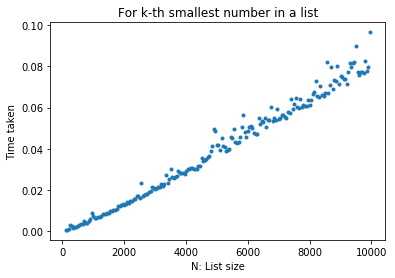

In [10]:
from matplotlib import pyplot as plt
plt.plot(N,t,'.')
plt.xlabel('N: List size')
plt.ylabel('Time taken')
plt.title('For k-th smallest number in a list')
plt.show()

We see that the underlying curve resembles that of $x\log(x)$. But, in order to confirm with the mathematics behind big-$O$ notation, to establish $f(x) = O(g(x))$ for $f$ and $g$ being real valued functions in $x$, we need to find a positive bound $M$, and a real number $x_0$ such that
$|f(x)|\leq Mg(x)$ for all $x\geq x_0$.

This means in our current context that we need to find a positive bound for sufficiently large value of $N$ for $\frac{t}{N\log(N)}$. The graph below shows us that such a bound exists.

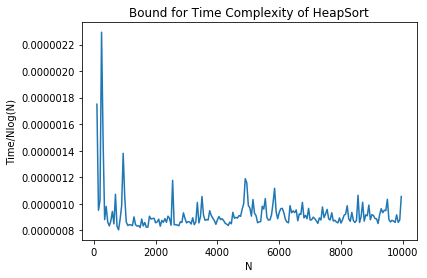

An upper bound for t/(Nlog(N)) is: 2.293088765523143e-06


In [11]:
import math
y=[]
for i in N:
    y=np.append(y,(i*math.log(i)))

y1 = t/y
from matplotlib import pyplot as plt
plt.plot(N,y1)
#plt.ylim(0.00000001,0.000002)
plt.xlabel('N')
plt.ylabel('Time/Nlog(N)')
plt.title('Bound for Time Complexity of HeapSort')
plt.show()

print(f'An upper bound for t/(Nlog(N)) is: {np.max(y1)}')

Thus, we have an algorithm and its implementation that works in $O(n\log(n))$ time to find the $k$th smallest number in the list.